In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import os
import matplotlib.ticker as ticker

D:\conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def open_file():
    path='C:\\Users\\zyx\\Desktop\\spectrum\\1arcsec'  #设置存储路径
    files= os.listdir(path) #得到文件夹下的所有文件名称
    data=[]  # 建立空列表储存数据
    data_i=0 # 记录是第几个文件
    for file in files:  #按照顺序在 files 里面进行每一个文件的 数据名称 循环读取
        position = path+"\\"+file   # 打开第一个文件
        data.append([])
        with open(position, 'r') as f:
            line_num=0
            for line in f:
                if line_num>0:
                    data[data_i].append(line.strip().split())
                line_num+=1
        data_i+=1
    return data  

#data=open_file()
#print(data)

In [3]:
def data_to_xy(data):   # 输入某一个文件的数据，转换成xy
    data_x=[]
    data_y=[]
    for i in range(len(data)):
        data_x.append(float(data[i][0]))
        data_y.append(float(data[i][1]))
    return data_x,data_y

#x,y=data_to_xy(data[0])
#print(y)
#print(data[0])

In [4]:
def paint(x,y):    # 把光谱画出来
    plt.plot(x,y)
    plt.xlabel("frequency (GHz)")
    plt.ylabel("flux (Jy/beam)")
    #plt.autoscale(enable=True, axis='y', tight=True)
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.show()

In [5]:
def hebin(list_x,list_y):    # 把列表每三个数据合成一个
    list_x_new=[]
    list_y_new=[]
    for i in range(int(len(list_x)/3)):
        x0=list_x[3*i]
        x1=list_x[3*i+1]
        x2=list_x[3*i+2]
        y0=list_y[3*i]
        y1=list_y[3*i+1]
        y2=list_y[3*i+2]
        list_x_new.append((x0+x1+x2)/3)
        list_y_new.append((y0+y1+y2)/3)
    return list_x_new,list_y_new

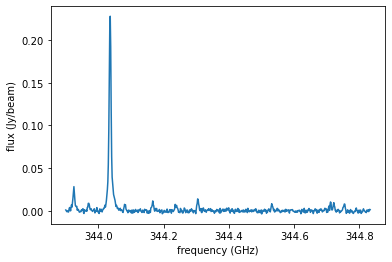

638


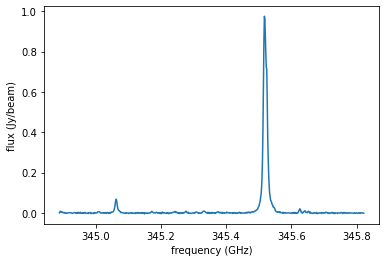

638


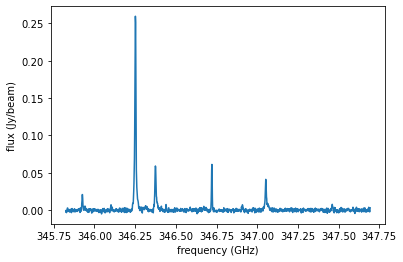

1278


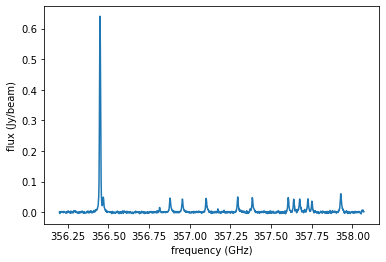

1278


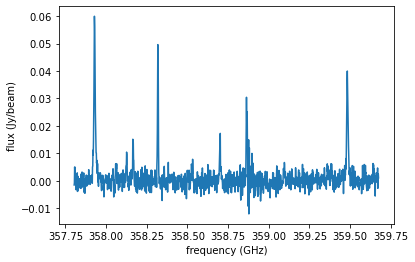

1278


In [6]:
data=open_file()
for i in range(len(data)):
    x,y=data_to_xy(data[i])
    x1,y1=hebin(x,y)
    paint(x1,y1)
    print(len(x1))
    #print("我画好啦")

In [7]:
# 找峰值
def find_peak1(x,y):
    data_x=np.array(x)
    data_y=np.array(y)
    peaks,_ = find_peaks(data_y)
    plt.plot(data_x,data_y)
    plt.plot(data_x[peaks], data_y[peaks], "x")
    #plt.plot(np.zeros_like(data_y), "--", color="gray")
    #plt.xlim(343.9,344.8)
    plt.show()
    
def find_peak2(x,y):
    m=max(y)
    index_m=y.index(m)
    return m,index_m


In [8]:
# 放大谱线
def enlarge(x,y):
    m,index_m=find_peak2(x,y)
    data_x=x[index_m-80:index_m+80]
    data_y=y[index_m-80:index_m+80]
    return data_x,data_y

def enlarge2(peak_list,x,y):
    large_peak_list_x=[]    #放大后的谱线
    large_peak_list_y=[]
    data_x=np.array(x)
    data_x_real=data_x/(1-(239.5*10e3/(3.0*10e8)))   # 把频率的红移/蓝移移回来
    data_x_real=[float('{:.8f}'.format(j)) for j in data_x_real]

    for i in range(len(peak_list)):
        index_m=data_x_real.index(peak_list[i])
        #print(index_m)
        data_x=data_x_real[index_m-30:index_m+30]
        #print(data_x)
        data_y=y[index_m-30:index_m+30]
        #print(data_y)
        large_peak_list_x.append(data_x)
        large_peak_list_y.append(data_y)
        
        #paint(data_x,data_y)
    return large_peak_list_x,large_peak_list_y

In [9]:
spw0_peak=[344.19997631,344.24591399,344.31042249,344.35733694,344.44188244,344.51030006,344.57969546,344.80596309,344.98629206,345.03076456]
spw1_peak=[345.33849123,345.79395884]
spw2_peak=[346.20164832,346.37855655,346.52858732,346.5989605,346.65173964,346.71624814,346.99822725,347.18686485,347.33054255,347.73909471]
spw3_peak=[356.73359532,356.75998539,357.10011993,357.16462743,357.2403759,357.38649655,357.45784651,357.58099883,357.67043123,357.89132257,357.92504249,357.96120636,358.01300872,358.03939879,358.21484185]
spw4_peak=[358.21484885,358.45089029,358.6043418,358.98845945,359.14924081,359.76988829]

name_spw0=["HC15N","34SO2","SO","CH3OCH3","CH3OH","CH3OCH3","34SO2","34SO2","34SO2","t-HCOOH"]
name_spw1=["SO2","CO"]
name_spw2=["CH3OH","SO2_v2=1???","SO","33SO2","SO2","t-HCOOH","H13CO+","13CH3OH???","SiO","SO+"]
name_spw3=["HCO+","SO2","34SO2","SO2","SO2","SO2","CH3OCH3","SO2","SO2","SO2","SO2","SO2","SO2","SO2","SO2"]
name_spw4=["SO2","CH3OCH3","CH3OH","34SO2","SO2","SO2"]
#for i in range(1):
x,y=data_to_xy(data[1])
x_large,y_large=enlarge2(spw1_peak,x,y)
#print(x_large,y_large)

In [10]:
# # 对齐速度
# c=299792458

# # name=['SO','CO','SO','HCO+','SO2']
# # rest_fre=[344.31061200,345.79598990,346.52848100,356.73422300,358.21564000]

# name_spw0=["HC15N","34SO2","SO","CH3OCH3","CH3OH","CH3OCH3","34SO2","34SO2","34SO2","t-HCOOH"]
# name_spw1=["SO2","CO"]
# name_spw2=["CH3OH","SO2_v2=1???","SO","33SO2","SO2","t-HCOOH","H13CO+","13CH3OH???","SiO","SO+"]
# name_spw3=["HCO+","SO2","34SO2","SO2","SO2","SO2","CH3OCH3","SO2","SO2","SO2","SO2","SO2","SO2","SO2","SO2"]
# name_spw4=["CH3OCH3","CH3OH","34SO2","SO2","SO2"]
# name=[name_spw0,name_spw1,name_spw2,name_spw3,name_spw4]

# spw0_peak=[344.19997631,344.24591399,344.31042249,344.35733694,344.44188244,344.51030006,344.57969546,344.80596309,344.98629206,345.03076456]
# rest_fre0=[344.2003199, 344.2453476, 344.310612, 344.3580659, 344.443433, 344.5153801, 344.581045, 344.8079157, 344.9875851, 345.030561]

# spw1_peak=[345.33849123,345.79395884]
# rest_fre1=[345.3385391,345.7959899]

# spw2_peak=[346.20164832,346.37855655,346.52858732,346.5989605,346.65173964,346.71624814,346.99822725,347.18686485,347.33054255,347.73909471]
# rest_fre2=[346.202719, 346.3791906, 346.528481, 346.5900976, 346.6521672, 346.718858,  346.998344, 347.188283, 347.330631, 347.740011]

# spw3_peak=[356.73359532,356.75998539,357.10011993,357.16462743,357.2403759,357.38649655,357.45784651,357.58099883,357.67043123,357.89132257,357.92504249,357.96120636,358.01300872,358.03939879,358.21484185]
# rest_fre3=[356.734223, 356.7551893, 357.1021822, 357.16536, 357.24119, 357.38757, 357.4602017, 357.5814483, 357.67178, 357.892442, 357.92596, 357.96289, 358.01309, 358.03808,358.21564]

# spw4_peak=[358.45089029,358.6043418,358.98845945,359.14924081,359.76988829]
# rest_fre4=[358.4519426, 358.605799, 358.9879745, 359.151156,359.7706815]

# peak=[spw0_peak,spw1_peak,spw2_peak,spw3_peak,spw4_peak]
# rest_fre=[rest_fre0,rest_fre1,rest_fre2,rest_fre3,rest_fre4]

# x=[]
# y=[]
# plt.figure(figsize=(20,12))
# for i in range(len(data)):
#     data_x,data_y=data_to_xy(data[i])   # 一个spw文件的所有x,y数据
#     #for n in range(len(name)):    # 循环每一个spw
#     x_large,y_large=enlarge2(peak[i],data_x,data_y)      # 一个光谱文件中，把所有的谱线挑出来，放在一个列表里 x_large=[[x,x,x,x],[x,x,x,x,x]]

#     for j in range(len(x_large)):    # 循环一个spw的每一个峰
#         list_x=[]
#         list_y=[]

#         for k in range(len(x_large[j])):            # 把某一个峰的列表数据取出来 peak1=x_large[i]=[x,x,x,x,x,x]
#             list_x.append((c*(x_large[j][k]-rest_fre[i][j])/rest_fre[i][j])/1000)
#             #list_x.append((c*(x_large[k]-rest_fre[j])/rest_fre[j])/1000+239.5)   # 将频率转换为速度，并加上视向速度
#             list_y.append(y_large[j][k])

#         plt.plot(list_x,list_y,label=name[i][j])
#         #plt.title(name[i])
#         plt.xlabel("velocities (km/s)")
#         plt.ylabel("flux (Jy/beam)")
#         #plt.legend()
#         #print(name[i])
#         #plt.xlim(-1,1)
#         print("频率起始值：",list_x[0])
#         print("频率结束值：",list_x[-1])
#         print("频率步长：",list_x[1]-list_x[0])
#         print(len(list_x))
#         print("------------------------------------") 
#         x.append(list_x)
#         y.append(list_y)
        

# plt.legend()
# plt.show()

频率起始值： -13.068474140182072
频率结束值： 12.04458194263983
频率步长： 0.42537914728911197
60
------------------------------------
频率起始值： -12.274300483956672
频率结束值： 12.835470781326624
频率步长： 0.42532350719182865
60
------------------------------------
频率起始值： -12.931009364559921
频率结束值： 12.174873023445427
频率步长： 0.42611359017858064
60
------------------------------------
频率起始值： -13.397984412303106
频率结束值： 11.703558996702144
频率步长： 0.42518428652453544
60
------------------------------------
频率起始值： -14.110637066700924
频率结束值： 10.98556422981554
频率步长： 0.42594927630947943
60
------------------------------------
频率起始值： -17.1781241335511
频率结束值： 7.911965994979389
频率步长： 0.4249901369663185
60
------------------------------------
频率起始值： -13.930110384215611
频率结束值： 11.156068485008436
频率步长： 0.42577916906573776
60
------------------------------------
频率起始值： -14.445274038355773
频率结束值： 10.624399064320453
频率步长： 0.4254990223123336
60
------------------------------------
频率起始值： -12.562485236501978
频率结束值： 12.490133042859606
频率

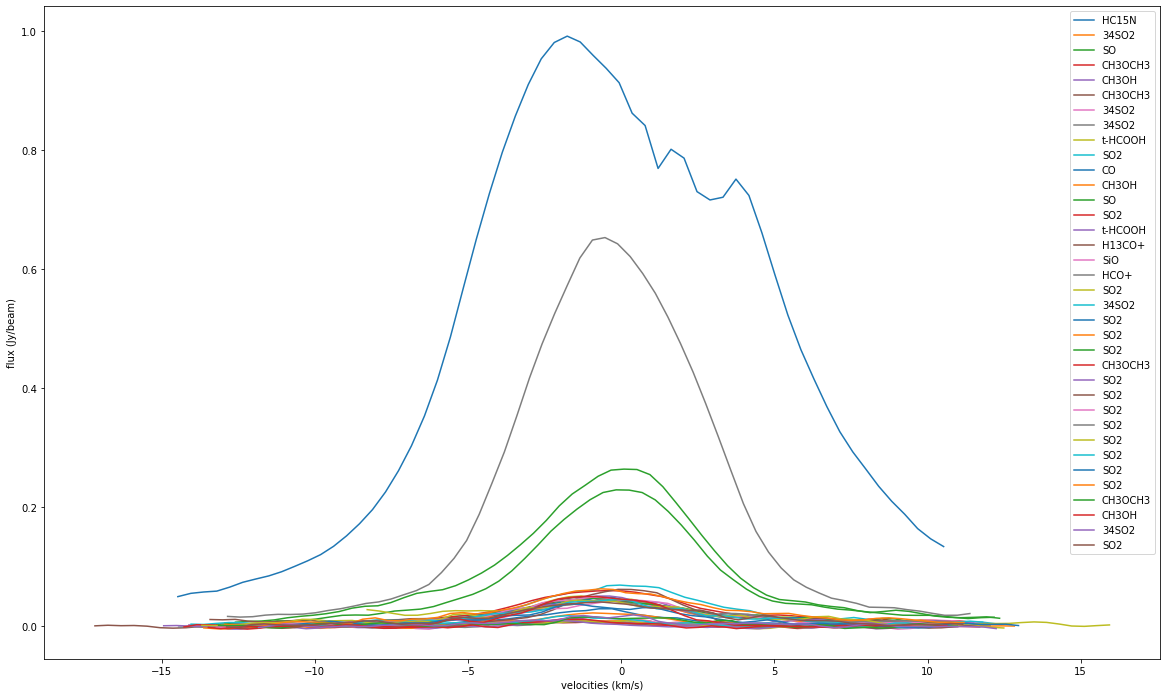

In [11]:
# 删掉识别不出的线和太密集的线
# 对齐速度
c=299792458

# name=['SO','CO','SO','HCO+','SO2']
# rest_fre=[344.31061200,345.79598990,346.52848100,356.73422300,358.21564000]

name_spw0=["HC15N","34SO2","SO","CH3OCH3","CH3OH","CH3OCH3","34SO2","34SO2","t-HCOOH"]
name_spw1=["SO2","CO"]
name_spw2=["CH3OH","SO","SO2","t-HCOOH","H13CO+","SiO","SO+"]
name_spw3=["HCO+","SO2","34SO2","SO2","SO2","SO2","CH3OCH3","SO2","SO2","SO2","SO2","SO2","SO2","SO2","SO2"]
name_spw4=["CH3OCH3","CH3OH","34SO2","SO2"]
name=[name_spw0,name_spw1,name_spw2,name_spw3,name_spw4]

spw0_peak=[344.19997631,344.24591399,344.31042249,344.35733694,344.44188244,344.51030006,344.57969546,344.80596309,345.03076456]
rest_fre0=[344.2003199, 344.2453476, 344.310612, 344.3580659, 344.443433, 344.5153801, 344.581045, 344.8079157,345.030561]

spw1_peak=[345.33849123,345.79395884]
rest_fre1=[345.3385391,345.7959899]

spw2_peak=[346.20164832,346.52858732,346.65173964,346.71624814,346.99822725,347.33054255]
rest_fre2=[346.202719,346.528481,346.6521672, 346.718858,  346.998344,347.330631]

spw3_peak=[356.73359532,356.75998539,357.10011993,357.16462743,357.2403759,357.38649655,357.45784651,357.58099883,357.67043123,357.89132257,357.92504249,357.96120636,358.01300872,358.03939879,358.21484185]
rest_fre3=[356.734223, 356.7551893, 357.1021822, 357.16536, 357.24119, 357.38757, 357.4602017, 357.5814483, 357.67178, 357.892442, 357.92596, 357.96289, 358.01309, 358.03808,358.21564]

spw4_peak=[358.45089029,358.6043418,358.98845945,359.76988829]
rest_fre4=[358.4519426, 358.605799, 358.9879745,359.7706815]

peak=[spw0_peak,spw1_peak,spw2_peak,spw3_peak,spw4_peak]
rest_fre=[rest_fre0,rest_fre1,rest_fre2,rest_fre3,rest_fre4]

x=[]
y=[]
plt.figure(figsize=(20,12))
for i in range(len(data)):
    data_x,data_y=data_to_xy(data[i])   # 一个spw文件的所有x,y数据
    #for n in range(len(name)):    # 循环每一个spw
    x_large,y_large=enlarge2(peak[i],data_x,data_y)      # 一个光谱文件中，把所有的谱线挑出来，放在一个列表里 x_large=[[x,x,x,x],[x,x,x,x,x]]

    for j in range(len(x_large)):    # 循环一个spw的每一个峰
        list_x=[]
        list_y=[]

        for k in range(len(x_large[j])):            # 把某一个峰的列表数据取出来 peak1=x_large[i]=[x,x,x,x,x,x]
            list_x.append((c*(x_large[j][k]-rest_fre[i][j])/rest_fre[i][j])/1000)
            #list_x.append((c*(x_large[k]-rest_fre[j])/rest_fre[j])/1000+239.5)   # 将频率转换为速度，并加上视向速度
            list_y.append(y_large[j][k])

        plt.plot(list_x,list_y,label=name[i][j])
        #plt.title(name[i])
        plt.xlabel("velocities (km/s)")
        plt.ylabel("flux (Jy/beam)")
        #plt.legend()
        #print(name[i])
        #plt.xlim(-1,1)
        print("频率起始值：",list_x[0])
        print("频率结束值：",list_x[-1])
        print("频率步长：",list_x[1]-list_x[0])
        print(len(list_x))
        print("------------------------------------") 
        x.append(list_x)
        y.append(list_y)
        

plt.legend()
plt.show()

In [12]:
delta_x=0.4262   # 频率步长
x_start=-20 
x_finish=20
num=int((x_finish-x_start)/delta_x)+1  # 对齐之后数据长度
print(num)

94


In [13]:
def duiqi_v(list_x,list_y):
    delta_x=0.4262   # 频率步长
    x_start=-36 
    x_finish=36
    num=int((x_finish-x_start)/delta_x)+1  # 对齐之后数据长度
    y_flux=[]   # 对齐横坐标之后，只需要记录纵坐标。这是纵坐标。
    find_x=[]
    find_y=[]
    find_x=list_x
    find_y=list_y

    for i in range(num):
        a=x_start+i*delta_x
        b=x_start+(i+1)*delta_x

    # 找原横坐标对应区间(比如新x轴在【-26.4，-26】区间内的数据，就要找到原来x轴位于该区间的数据)
        if len(find_x)>=3:        # 原来x轴的数据还剩下3个以上
            data1_x=find_x[0]
            data2_x=find_x[1]
            data3_x=find_x[2]
            #print(data1_x)
            if data1_x>=a and data1_x<=b and data2_x>=b:
                y_flux.append(find_y[0])
                find_x.remove(data1_x)   # 把已经找到的数据删掉
                find_y.remove(find_y[0])
                #print("进入了第一种情况")
                continue
            elif data1_x>b:
                y_flux.append(0)
#                 print("有0")
#                 print(n)
#                 print(data1_x,data2_x,data3_x)
#                 print(a,b)
                continue
            elif data1_x>=a and data2_x<=b and data3_x>b:
                y_flux.append((find_y[0]+find_y[1])/2)
                find_x.remove(data1_x)
                find_x.remove(data2_x)
                find_y.remove(find_y[0])
                find_y.remove(find_y[0])
                #print("进入了第三种情况")
                continue

        elif len(find_x)==2:         # 原来x轴的数据还剩下2个
            #print("还有2个数据！")
            data1_x=find_x[0]
            data2_x=find_x[1]
            if data1_x>=a and data1_x<=b and data2_x>=b:
                y_flux.append(find_y[0])
                find_x.remove(data1_x)   # 把已经找到的数据删掉
                find_y.remove(find_y[0])
                #print("进入了第一种情况")
                continue
            elif data1_x>b:
                y_flux.append(0)

                continue
            elif data1_x>=a and data2_x<=b:
                y_flux.append((find_y[0]+find_y[1])/2)
                find_x.remove(data1_x)
                find_x.remove(data2_x)
                find_y.remove(find_y[0])
                find_y.remove(find_y[0])
                #print("进入了第三种情况")
                continue

        elif len(find_x)==1:       # 原来x轴的数据还剩下1个
            #print("还有1个数据！")
            y_flux.append(find_y[0])
            find_x.remove(find_x[0])   # 把已经找到的数据删掉
            find_y.remove(find_y[0])
            continue

        elif len(find_x)==0:
            #print("没有数据了！")
            y_flux.append(0)
        

    #print(y_flux)
    plt.plot(y_flux)
    return y_flux

[0.00357945543, 0.00265826145, 0.00391240092, 0.00564540643, 0.00559322862, 0.00298703369, 0.00144480693, 0.000642506406, -0.000999146141, 0.000762847892, 0.00339851645, 0.00392309856, 0.00551732862, 0.00727702072, 0.00796801969, 0.00644347724, 0.00352442334, 0.00401985971, 0.00587870786, 0.00854025129, 0.0111147473, 0.0103784595, 0.0123907626, 0.015342705, 0.0176500808, 0.0195492674, 0.0227942932, 0.0252176877, 0.0264056157, 0.0294524208, 0.0295085665, 0.0245511979, 0.0199574139, 0.0167464204, 0.014628415, 0.0141234295, 0.0107465144, 0.00742049003, 0.00578431692, 0.00664719613, 0.0057123052, 0.00516826194, 0.00566033926, 0.00488252519, 0.00432211114, 0.00581383007, 0.00739543885, 0.00547202723, 0.00343997031, 0.002434175, 0.000177414971, 2.91327126e-07, 0.00124023098, 0.00161118223, 0.00298847072, 0.00227327971, 0.00138160959, 0.00199647155, 0.000962860533, 0.000679975667]


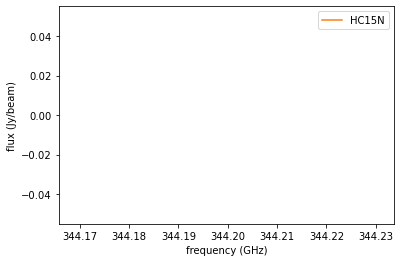

[-0.00123908545, 0.00234978716, 0.0032177621, -0.000394151517, -0.000514031271, 0.00103048549, 0.000437710987, -0.000373212417, -2.42459282e-05, -9.89739638e-05, -0.000311347452, -0.000215185966, 0.00132648437, 0.00228014262, -0.000117643722, -0.00175522093, -0.00068585627, 0.00136729446, 0.00500461739, 0.00555644091, 0.00181566249, 0.00238666567, 0.00502854399, 0.00526544685, 0.00817553792, 0.00958450418, 0.0087464042, 0.00867988076, 0.00907579996, 0.00924802665, 0.011428114, 0.00927418284, 0.00281573785, 0.0018074133, 0.00429866277, 0.00685654953, 0.00529582985, 0.000578764826, -0.000838108361, 0.000221838156, 0.00155580218, 0.0024577491, 0.00280748564, 0.00256607123, 0.00251517748, 0.00190879405, 0.00076502451, 0.000914013479, 0.00103650615, 0.000601475942, -0.000480443938, -0.000965452578, -6.19750645e-05, -0.000727274048, -0.000294483412, 0.000874480291, 0.000574698788, 0.000341085804, 0.000770082115, 0.000451422558]


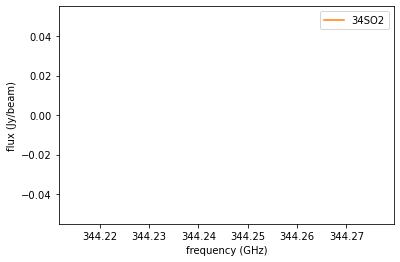

[0.00559626892, 0.00447377423, 0.0037110222, 0.00566457072, 0.0091319168, 0.00915482081, 0.00954894256, 0.0122444937, 0.0154888146, 0.0185000915, 0.0190241262, 0.0187217332, 0.021805441, 0.0256559364, 0.027232822, 0.0289443024, 0.0332451239, 0.0401732102, 0.0468905829, 0.0537202433, 0.0630881116, 0.0759066418, 0.0931820422, 0.114170328, 0.136552617, 0.159934551, 0.17948477, 0.197022319, 0.212744027, 0.22489135, 0.229347959, 0.228934109, 0.224836379, 0.212496147, 0.193034902, 0.17024684, 0.144974276, 0.117906362, 0.0946680009, 0.0781713203, 0.0624514222, 0.050180573, 0.0425113551, 0.0386577509, 0.0375377201, 0.0362177305, 0.0321842209, 0.0288780611, 0.0272547677, 0.0248724781, 0.0227731708, 0.0206508934, 0.0186667051, 0.0184612907, 0.0185170751, 0.0172267072, 0.0147831142, 0.0130538214, 0.0145420255, 0.0152769089]


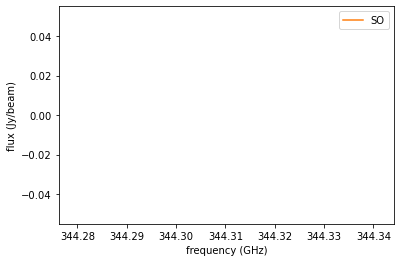

[0.000902932545, -0.000222561124, 0.000546311203, 0.0019832314, 0.00132835971, 0.000307661743, 0.00132309471, 0.00156979612, 0.00081932242, 0.00154912879, 0.00155872479, -0.00142556673, -0.00155919045, -0.00093456998, -0.00187527889, -0.00320637668, -0.00275355717, 0.000634632481, 0.00312324287, 0.00174645532, 0.00167733675, 0.00413958309, 0.00451648235, 0.0046448512, 0.00715840328, 0.00806741975, 0.00794526283, 0.00633929716, 0.0063419817, 0.00733741792, 0.00813357998, 0.00729202712, 0.00604870077, 0.00331776054, 0.00135320739, 0.00175419054, 0.0029831375, 0.00185335206, -0.000868964067, -0.00143798988, 0.000192614869, 0.00147888681, 0.00175264745, 0.000745084544, -0.00144740369, -0.00363857695, -0.00266056764, 8.12798098e-05, 0.00108273048, 0.000618205406, 0.00044830062, 0.00105387322, 0.000884398178, 0.00115163554, 0.000848475727, -0.00135274895, -0.00158020086, 0.000117689233, -0.000348678179, -0.000956648495]


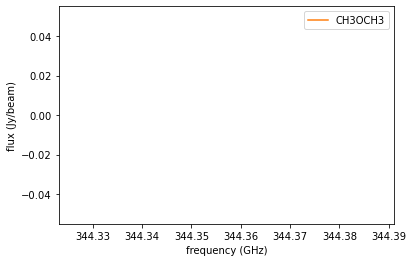

[0.00229940121, 0.00259196898, -0.00101728225, -0.00468726456, -0.00459715025, -0.00219355035, -0.00153051596, -0.00154031615, 0.000437584677, 0.00191368337, 0.00165279245, 0.000469161751, -0.000804770505, -0.0021635897, -0.00218051462, -0.00087856286, 0.00127104146, 0.00420850795, 0.00504114199, 0.00383099564, 0.00416343333, 0.00433710637, 0.00268614502, 0.00371724484, 0.00816582795, 0.0107503077, 0.00649141427, 0.0056831534, 0.00882764813, 0.012717369, 0.0137838144, 0.00921923202, 0.00582671678, 0.0070516686, 0.00710121682, 0.00689934334, 0.00472659897, 0.0026852875, 0.00190351286, 0.0015703392, 0.000623342406, -0.000605645066, -0.000741407683, 0.000733929337, 0.00158939918, 0.00201199017, 0.00318147102, 0.00317667401, 0.00241167704, 0.000478041649, -0.000761638221, 0.00147082726, 0.00334261754, 0.00310193887, 0.00234974199, 0.00104347989, -0.0006491518, -0.000898883853, -0.000722090132, -0.000745509635]


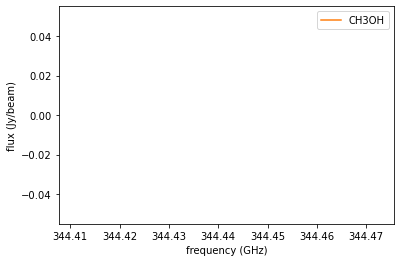

[0.000804555661, 0.00180042849, 0.00105889712, 0.00137713051, 0.00025508384, -0.00230721291, -0.00308604166, -0.00237402273, -0.000414563925, 0.00228388654, 0.00269759074, 0.000679556804, 0.000761897129, 0.00145217788, 0.000735040987, 0.000617323094, 0.000573379046, 0.00011218297, -0.00107996876, -0.000955938653, 0.00116670819, 0.000990955741, -0.000197530011, 0.00103793619, 0.00169305084, 0.00117457996, 0.0014143954, 0.00255438243, 0.00502473256, 0.00860607252, 0.00904234219, 0.00553787872, 0.00294327736, 0.00418893062, 0.00593198184, 0.00613443507, 0.00629032077, 0.00702907238, 0.00736645795, 0.00671065599, 0.00533648441, 0.00391351944, 0.00350115565, 0.00369940838, 0.00433956971, 0.00358198374, 0.00159417815, 0.0021402, 0.00205601938, -3.28628194e-05, -0.00153057685, -0.00192718115, -0.00114825345, -0.000678596669, -0.000728716841, -0.000767181802, -0.00119321083, -0.00260722265, -0.00182321551, -0.00180473749]


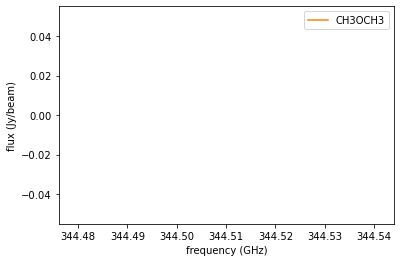

[-0.000265671028, -0.00106955192, -0.0030888617, -0.00238610525, -6.53945463e-05, 0.000515901716, 0.000527797965, -0.000146962833, -0.00057277939, -3.60382328e-05, 0.000694999995, 0.000298234954, 0.000492689898, 0.000466343481, -0.00157485227, -0.00139801274, -0.000977776828, -0.00367366849, -0.00475018518, -0.00135300122, 0.00335123902, 0.00452901609, 0.00498503819, 0.00709082047, 0.00735766906, 0.00749684079, 0.00897162035, 0.00971545, 0.0103133777, 0.0149096372, 0.0171217453, 0.0145345144, 0.0128539335, 0.0126273716, 0.0112267397, 0.00863283407, 0.00460769841, 0.00706643937, 0.00595000573, 0.00447097886, 0.00325365947, 0.00141722488, -0.000289535004, -0.00057776965, 0.000731404696, 0.000715504808, -0.000783081981, 0.00127792219, 0.00460306974, 0.00462289806, 0.00258272421, 0.00122501631, 0.000928666326, -0.00164589984, -0.00473262928, -0.00355644268, -0.000687433174, -0.00101834722, -0.000682828831, 0.00318680983]


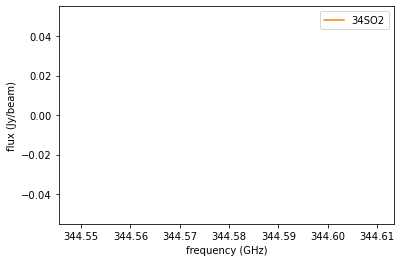

[-0.00143149227, -0.000503823743, -0.00169285864, -0.00206467998, -0.00198741979, -0.0008541969, 0.000754033681, 0.00132817309, 0.00118147663, 0.0019499443, 0.00131402386, 0.000990982749, 0.00324037415, 0.00346488366, 0.000919962593, -0.0010111297, 1.6163598e-05, 0.0024170971, 0.00185102341, -0.00103713176, -0.00137525483, -0.000773350475, -0.00181179226, -0.000582904962, 0.00240340666, 0.00251936191, 0.00132623734, 0.00237726467, 0.00512724929, 0.00699439319, 0.0087489821, 0.00858399086, 0.00815333333, 0.00804227404, 0.00690591801, 0.00464554923, 0.00456337538, 0.00595311774, 0.00487987371, 0.0032352386, 0.00366886286, 0.00235018856, 0.000683380524, 0.000451701926, 0.000319595332, 0.0019907793, 0.00320754969, 0.000852278026, -0.00195984403, -0.00166276912, -6.67491477e-05, -0.000230916907, -0.00138488435, -0.000817607448, 0.00062411488, 0.00119921146, 0.000365385553, 0.000745992817, 0.00117203372, 0.000656972581]


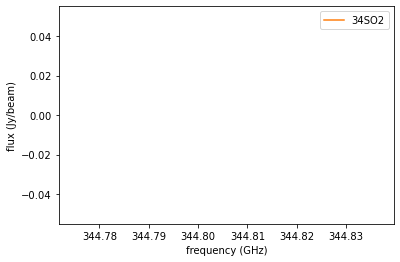

[0.000342826213, 0.00315604103, 0.00170441309, -0.00201186235, -0.00238583726, -0.000373741641, -0.00047689912, -0.00134521117, -0.000633622112, 9.37303193e-05, 0.000238801134, 0.00060833554, 0.000713197398, 0.00016448152, 0.00049101928, 0.0016094771, 0.00190339866, 0.00195077341, 0.00396148488, 0.00589452405, 0.00564555731, 0.0041515911, 0.00405094074, 0.00552678853, 0.00618647644, 0.00684300251, 0.00849073753, 0.00882770773, 0.00726193702, 0.00792717561, 0.0093299048, 0.00649375189, 0.00365325669, 0.00361921359, 0.00349773257, 0.00244802027, 0.00140968768, 0.0001355524, -0.00155321183, -0.00285249692, -0.00404570717, -0.00335769635, -0.000623594329, -0.0012539766, -0.00297513721, -0.00114390627, 0.00206654612, 0.00247519207, 0.00129727484, 0.000317734171, -0.00180972926, -0.00226799259, -0.00124779134, -0.00157646358, 0.000131559384, 0.00191486732, 0.00138534897, 0.000246180949, -0.00162903965, -0.00278237113]


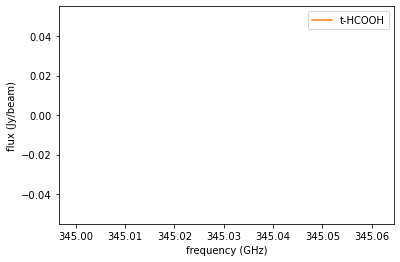

[0.00401514163, 0.00446614996, 0.00415033521, 0.00490783621, 0.00470091123, 0.00308042718, 0.00344895595, 0.00430969475, 0.00407858798, 0.00449609291, 0.00529702567, 0.00459784688, 0.0044315597, 0.00833873544, 0.0105552971, 0.00947050843, 0.0106313201, 0.015906591, 0.0182957221, 0.0179402884, 0.0213159584, 0.0266799144, 0.0305630639, 0.0376334228, 0.0456997007, 0.0512034148, 0.0557806157, 0.0590883195, 0.060268268, 0.0682214871, 0.06928619, 0.0677405298, 0.067187421, 0.0649485514, 0.056738846, 0.048834227, 0.0435970463, 0.0377435498, 0.0320531987, 0.0288678203, 0.0262346063, 0.0202626809, 0.0155590167, 0.0145561434, 0.0167999361, 0.0153572122, 0.0113615403, 0.0125747742, 0.0148001639, 0.0118421931, 0.00946672726, 0.00864677317, 0.00799437519, 0.00705334265, 0.00508342264, 0.00529181864, 0.0065325168, 0.00772055658, 0.00678144302, 0.0040609967]


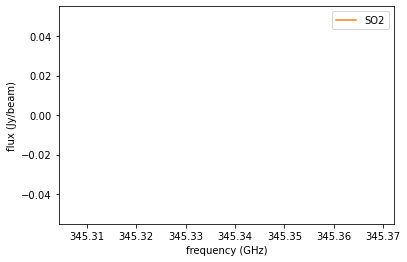

[0.0499040447, 0.0554179177, 0.0577160195, 0.0591653883, 0.0659107268, 0.0739762112, 0.079482615, 0.0847009718, 0.0917683989, 0.100751318, 0.110081695, 0.120494299, 0.134476095, 0.152092382, 0.172502697, 0.196191892, 0.22581625, 0.261495143, 0.303424388, 0.353546947, 0.413697153, 0.486243814, 0.569156408, 0.650922418, 0.727085114, 0.796701014, 0.85745424, 0.910591483, 0.953778446, 0.981163383, 0.991877198, 0.982073843, 0.95943141, 0.937835515, 0.913593233, 0.862363398, 0.841628551, 0.769526243, 0.80175215, 0.786839664, 0.730538547, 0.716547191, 0.721117437, 0.75157547, 0.724111974, 0.661208749, 0.590925932, 0.523104966, 0.46507892, 0.416039824, 0.369432151, 0.327083588, 0.293157279, 0.26441136, 0.235287756, 0.210162267, 0.188403621, 0.164199486, 0.147047266, 0.134059295]


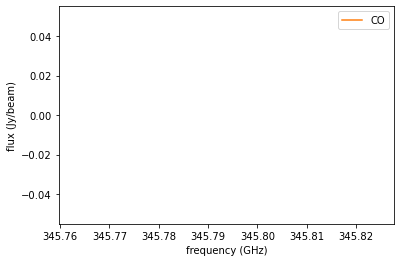

[-0.00261421362, -0.00411087601, -0.0040373113, -0.000855093414, 0.00215876359, 0.00345525867, 0.00358790206, 0.00167006103, -0.00170860731, -0.00333199929, -0.00183919037, -0.000708595675, -0.000162783792, 0.000805657299, 0.000421769859, -0.00221749884, -0.00330746779, -0.000698288146, 0.00104541972, -4.98782429e-05, 0.000839601387, 0.00461812317, 0.00897555519, 0.00954621471, 0.00877972506, 0.00949107204, 0.0123278117, 0.016083844, 0.0190978833, 0.0212172996, 0.0225447752, 0.0217192695, 0.0207806397, 0.0200745221, 0.018466508, 0.015438837, 0.0121411188, 0.00835986715, 0.00534181204, 0.00754317734, 0.00785406213, 0.00478429906, 0.00129204767, 0.00061259605, 0.0024774645, 0.00220284238, 0.00106518948, 0.000713919813, -0.000193395652, -0.000601542357, 0.00110228267, 0.0018017079, 0.000283720903, -0.000879812753, 0.000545210554, 0.00199873699, 0.00229859562, 0.00212057284, 0.0034439778, 0.00547862146]


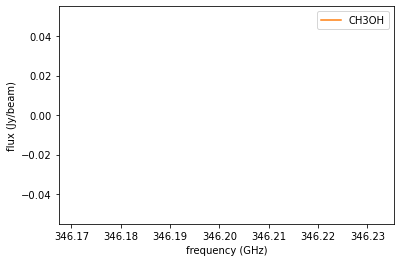

[0.00694685429, 0.0082176337, 0.00888844021, 0.0107970499, 0.014321615, 0.0167722963, 0.018643884, 0.0212027915, 0.0248044524, 0.0305279139, 0.0336705036, 0.0345125534, 0.0399049185, 0.048129797, 0.0554099679, 0.058696337, 0.0615469106, 0.0683082715, 0.0781048015, 0.0895336494, 0.1028312, 0.11901544, 0.137027904, 0.156175509, 0.177927837, 0.20238781, 0.222339869, 0.236991256, 0.252191544, 0.262519568, 0.264195532, 0.263530761, 0.255000472, 0.234687194, 0.208252802, 0.180962026, 0.153194785, 0.126714155, 0.101770617, 0.080964148, 0.0649710223, 0.0525335483, 0.0450224653, 0.0430145264, 0.0409043767, 0.0361560732, 0.0333703123, 0.0313007608, 0.0264551453, 0.0230139624, 0.0248429347, 0.0270218495, 0.0251167174, 0.0211957861, 0.0172451194, 0.015193576, 0.0145074613, 0.0150774717, 0.0159243178, 0.0135484878]


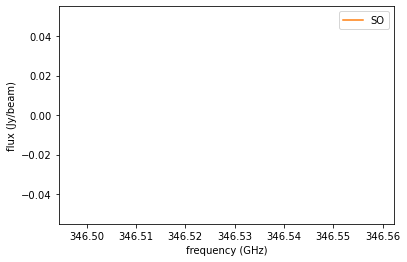

[-0.00199109409, -0.00280929613, -0.00466444017, -0.0030731929, 0.000256163708, 0.00280922791, 0.00497852499, 0.00452763215, 0.0038290564, 0.00543143461, 0.00797964167, 0.00870688912, 0.00627381029, 0.00483324472, 0.00425446266, 0.00630534114, 0.0108321328, 0.0147855571, 0.0163802728, 0.0183914863, 0.0216614734, 0.0257360991, 0.0310924165, 0.0369464606, 0.0433803312, 0.0486582443, 0.0523021445, 0.0562623851, 0.0579903983, 0.0594521128, 0.0600220934, 0.0594249256, 0.0572198853, 0.0536222942, 0.0500803217, 0.0442580096, 0.036476519, 0.0301996209, 0.0262558404, 0.0224669576, 0.0190297253, 0.0178336576, 0.0184680447, 0.0190959089, 0.0178542119, 0.0154235121, 0.0134134265, 0.0115356399, 0.00820019003, 0.00860066712, 0.0118111242, 0.0125215463, 0.00879719015, 0.00823718309, 0.0103304563, 0.0100557497, 0.00893408246, 0.00912406668, 0.00640856242, 0.00440971553]


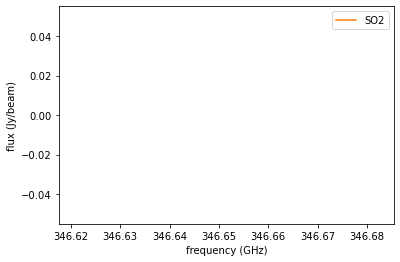

[0.000980693032, 0.00132147642, 0.000479432405, -1.42925419e-05, -0.000317762693, -0.000800319598, -0.00105390081, 5.657371e-05, 0.00147260446, 0.00106333836, -0.00165377825, -0.00402368186, -0.00277916389, -0.00109468715, -0.000320527644, 0.00212227018, 0.00279983273, 0.000545788091, -0.000667469343, -0.00134202838, -0.00245018746, -0.0030354932, -0.000549119781, 0.0016226361, -6.83557373e-05, -0.000630702008, 0.000693932758, 0.00179878913, 0.00436473126, 0.00742530311, 0.00993949547, 0.00932657253, 0.00803508703, 0.0052906652, 0.00400897954, 0.00335641671, 0.00181263464, 0.00093601679, 0.000253551058, -0.000853432517, -0.000560284127, -0.000997083145, -0.00183682202, -0.00032798457, -0.000891913078, -0.00343014277, -0.00396221923, -0.00169911503, 0.000403977465, -0.00183479523, -0.00298026018, -0.000985766295, -0.000353282376, -0.000167730002, -0.00136637758, -0.0040408913, -0.00335823256, -0.00128606358, 0.000442331453, 0.00189163827]


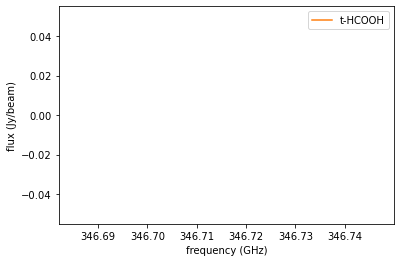

[-0.00116391038, -0.00278518349, -0.00137822551, -0.00185637176, -0.00329418341, -0.00219065882, 0.00102993834, 0.00247306889, 0.000543179514, -0.000599385181, -0.000886194292, -0.00252559129, -0.00285151764, -0.000160343232, 0.000484030374, -0.000495352666, -4.5409899e-05, 0.000298711355, 0.000702589867, 0.00399466464, 0.00803935528, 0.00993808266, 0.012303913, 0.0147869801, 0.0198602099, 0.0278572198, 0.0382434614, 0.0476950444, 0.053444773, 0.0581745505, 0.0620994866, 0.0619361252, 0.0598010048, 0.0563577227, 0.0462453887, 0.0360911302, 0.0274250861, 0.0172025841, 0.00727674039, 0.00354903145, 0.00331275305, 0.00277984538, 0.00079626753, 0.000365758693, 0.00164048595, 0.00289273774, 0.00311300321, 0.0031295754, 0.00152920792, -0.00168077834, -0.00364257186, -0.00319590629, -0.00142882182, -0.00128963601, -0.00293034455, -0.00248391181, -0.000787483237, 0.00126976462, 0.00391880982, 0.00359304715]


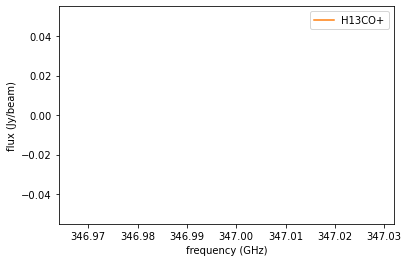

[0.00449109823, 0.00476948172, 0.00451481761, 0.00465241214, 0.00543827005, 0.00504645798, 0.00346875191, 0.0022226579, 0.00195355457, 0.00351223792, 0.00509737991, 0.00600823667, 0.00697068032, 0.00804456044, 0.00847736374, 0.00793487951, 0.00826400891, 0.00990689732, 0.0108044362, 0.0136013487, 0.0142883137, 0.0145283211, 0.0199014843, 0.0245218202, 0.0282375533, 0.0295677967, 0.030380683, 0.0351554193, 0.0381621718, 0.0414992981, 0.0441757627, 0.0417298041, 0.0373215564, 0.0326382369, 0.0294031762, 0.0249773078, 0.0197561979, 0.0185964163, 0.0175535399, 0.0171479825, 0.0183110591, 0.0153306695, 0.0128323222, 0.0110804224, 0.0065364982, 0.00579888886, 0.00709965779, 0.00729197869, 0.00777126849, 0.00932195783, 0.00984199252, 0.00770219881, 0.00685150269, 0.00898594223, 0.00996707845, 0.00992675312, 0.00912695099, 0.00756486738, 0.00526794838, 0.00361242448]


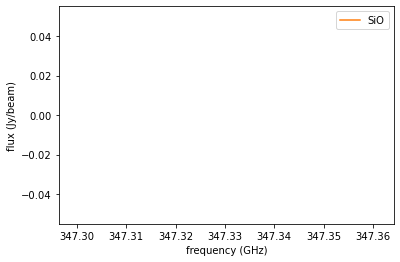

[0.0166755319, 0.0155045912, 0.0161907934, 0.0188061967, 0.0201541856, 0.0199431852, 0.0205678027, 0.0227956325, 0.0266326778, 0.0296140779, 0.0338543914, 0.0384464003, 0.0409771353, 0.0459311604, 0.0530244485, 0.0599580519, 0.070346579, 0.090349324, 0.114194952, 0.144259751, 0.188254848, 0.239733279, 0.293071628, 0.354197621, 0.417490572, 0.474637091, 0.52570492, 0.572896421, 0.618941367, 0.649168134, 0.653322458, 0.642874539, 0.621448398, 0.592834651, 0.559732139, 0.519658625, 0.475251943, 0.427340508, 0.374402821, 0.319001198, 0.262206584, 0.206265122, 0.159431621, 0.124613024, 0.0981033519, 0.0781271756, 0.0656631365, 0.0561767407, 0.0473228469, 0.0432738997, 0.0385934673, 0.0321809202, 0.0317868963, 0.0311973765, 0.0280450545, 0.0255937222, 0.0219066311, 0.0185158849, 0.0186465848, 0.0214703195]


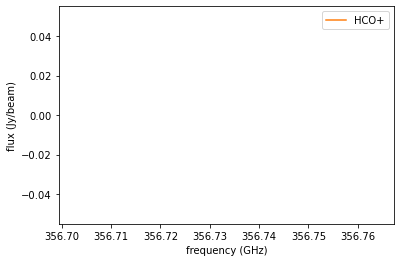

[0.0280450545, 0.0255937222, 0.0219066311, 0.0185158849, 0.0186465848, 0.0214703195, 0.0251690038, 0.0262844842, 0.0258550756, 0.0263184905, 0.0258977301, 0.0262261909, 0.0289027505, 0.0331750587, 0.0393664986, 0.0452647209, 0.049641896, 0.0509684943, 0.0476737171, 0.045696076, 0.0459885187, 0.0454367213, 0.0414201021, 0.0362817869, 0.0327657387, 0.0303307604, 0.0255803615, 0.0191122312, 0.0159921013, 0.0155114587, 0.0167060178, 0.0151745491, 0.0135267675, 0.0154520972, 0.0154583845, 0.0118224835, 0.00955952797, 0.00959616806, 0.0107894558, 0.0110628027, 0.00774665736, 0.00752417138, 0.00755893067, 0.00916277338, 0.0101484247, 0.00596047053, 0.0029566898, 0.00309785781, 0.00395991048, 0.00442842068, 0.00470471056, 0.0048727314, 0.00631846488, 0.00739463605, 0.00660084235, 0.00385957607, 0.000505824166, -5.13093619e-05, 0.00119778095, 0.00232671201]


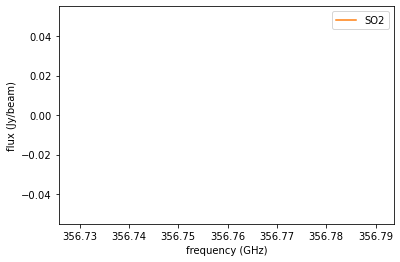

[0.0036471365, 0.00311323581, 0.00489024585, 0.00639179861, 0.00623499136, 0.0044103018, 0.0029110068, 0.00555065554, 0.00621874444, 0.00225554314, 0.000219057489, -0.00185779063, -0.000794502732, 0.00336286053, 0.00324986107, 0.000959415804, -0.000495989982, -0.00135492848, 0.000924625085, 0.00413731346, 0.00525054242, 0.0058958265, 0.00647601672, 0.00612978078, 0.00457591983, 0.00484513165, 0.0068930313, 0.00827149581, 0.0125609711, 0.0163586456, 0.0179015864, 0.0162193459, 0.0138161164, 0.0134878885, 0.0127989734, 0.0111115556, 0.00924710091, 0.00495169777, 0.00375714782, 0.00564181153, 0.0059967651, 0.00341194565, 0.00184334174, 0.0022142285, 0.000872458157, -0.000390953646, -3.85456988e-05, 0.00117066433, 0.00384409516, 0.00297670998, 1.65223228e-05, -0.00043765537, -0.00132667494, -0.000809136138, 0.00146178377, 0.00112059037, -0.0018060006, -0.00252376334, -2.2172153e-05, 0.000752544904]


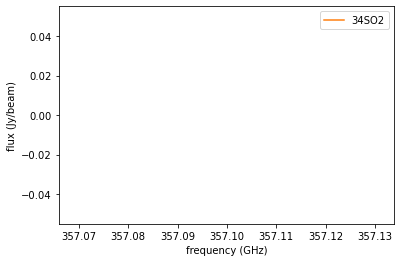

[0.00151013618, 0.00106766005, 0.000582174049, 0.00128373783, 0.00109514722, 0.00194442703, 0.00395843247, 0.00512396218, 0.00499161193, 0.00454935478, 0.00494540902, 0.00601150282, 0.00660930946, 0.00564743951, 0.00472781109, 0.00581356511, 0.00855357386, 0.01049631, 0.0106383404, 0.0144772194, 0.018825233, 0.0217750762, 0.0249515492, 0.0274130423, 0.0307401381, 0.0353765264, 0.037898317, 0.0416665636, 0.0437158868, 0.0455770269, 0.0497364961, 0.0479639284, 0.0417426899, 0.039133206, 0.0365589708, 0.0336530767, 0.0303287208, 0.0256113224, 0.0221612584, 0.0200950354, 0.0185807031, 0.0188644435, 0.0179299898, 0.0155623611, 0.0137425344, 0.014158871, 0.0144943288, 0.0121282954, 0.0125272404, 0.0118109183, 0.00868287869, 0.0107263019, 0.00958229601, 0.00575005123, 0.00501184678, 0.00770112965, 0.0072452547, 0.0044132201, 0.00466500409, 0.00496412953]


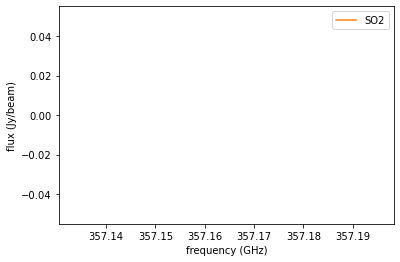

[0.000396313553, 0.00168359652, 0.00386868883, 0.00443437463, 0.00428622589, 0.0036275005, 0.00320915109, 0.00366088562, 0.00426279008, 0.0030629097, 0.0021743197, 0.00475014327, 0.0068140002, 0.0063200742, 0.0066190483, 0.0065582823, 0.00718384841, 0.0119124176, 0.013215933, 0.0129969195, 0.0141499825, 0.0157142989, 0.0187257994, 0.0225611348, 0.0252628122, 0.0295641422, 0.0343395472, 0.036150258, 0.0374779627, 0.0413727351, 0.0446233153, 0.0432242006, 0.0402041189, 0.0394930281, 0.0370421894, 0.0323408842, 0.0291554239, 0.0225294791, 0.0188091546, 0.0183697324, 0.0180194732, 0.0168472175, 0.0156650115, 0.0140868891, 0.0129894549, 0.0105595291, 0.00831243768, 0.00954776071, 0.00845457148, 0.00635381462, 0.00647357013, 0.00741458312, 0.00656610355, 0.00360620883, 0.00390423625, 0.00377845531, 0.00420078821, 0.00516598206, 0.00435581291, 0.00483830553]


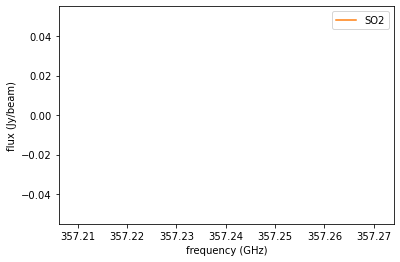

[0.00233042822, 0.00399530632, 0.00326859509, 0.00109005789, 0.0014958441, 0.00282083056, 0.0028488806, 0.00315315509, 0.00356190722, 0.000922173087, 0.000213508334, 0.0040987106, 0.00690702302, 0.00673971232, 0.0082022706, 0.009234895, 0.00697610667, 0.00853809342, 0.0114305876, 0.0133496793, 0.0143999476, 0.018238239, 0.0226602145, 0.0238526836, 0.0264747981, 0.0319338664, 0.0374740548, 0.0411236472, 0.0443322398, 0.0461789034, 0.0473250039, 0.0464181714, 0.0426713377, 0.0396090299, 0.038366586, 0.0359326936, 0.0331551656, 0.0310485903, 0.027243346, 0.021886535, 0.0164130088, 0.0152018368, 0.0183776636, 0.0190636124, 0.0166773032, 0.0133334352, 0.0123136938, 0.0146020874, 0.0152018853, 0.00869455189, 0.00316993915, 0.00589342555, 0.0108659286, 0.0132033899, 0.0124349128, 0.00877897162, 0.00707419403, 0.00627910998, 0.00586378109, 0.00612816634]


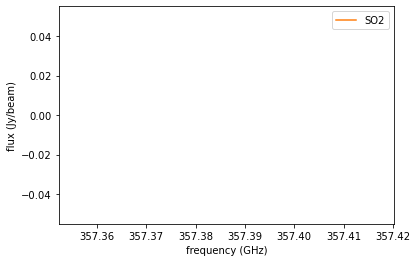

[-0.00104471727, 0.00266681123, 0.0025873105, 0.00115668552, 0.000279484608, -0.00104459596, -0.000359700876, 0.00227841502, 0.00352358562, 0.00173667993, -0.000488011981, -0.00135159178, -0.0019954429, -0.00101370236, 0.00173143588, 0.00146995415, -0.00046593204, -0.00115152565, -0.00170868577, -0.00122134387, -0.000721133139, -0.0024602504, -0.000515735999, 0.0023321812, -0.000759444083, -0.00198681839, 0.00257946597, 0.00611103512, 0.0070671048, 0.00859248638, 0.0121289352, 0.0118406806, 0.0117105665, 0.00934087764, 0.00657458091, 0.00536526367, 0.00468755187, 0.00453281915, 0.00380541361, 0.000326525944, -0.00270043826, -0.00171059824, 0.000872643199, -0.000944912317, -0.00385123445, -0.00195798092, 0.000453269517, 0.00044038787, -0.000335195451, -0.000355471537, -0.000203246658, 0.000796296052, 0.00164950802, 0.00269907899, 0.00318463985, 0.000264632632, -0.000621761952, 0.000972233247, -9.82631354e-06, -3.80629826e-05]


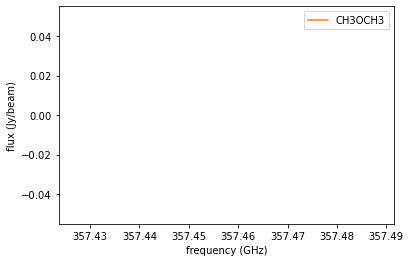

[0.00275143981, 0.00329148397, 0.00297910022, 0.00204707636, 0.000775664405, 0.0012847496, 0.00103740324, -0.000524186704, 0.00226648804, 0.00662420364, 0.00878990442, 0.00737542752, 0.00595575105, 0.00378834154, 0.00750230625, 0.011414526, 0.0119262235, 0.0117601817, 0.012410339, 0.0144085111, 0.0191920269, 0.022160884, 0.0237723775, 0.0283769872, 0.0333790369, 0.0358465649, 0.0373550653, 0.0423987806, 0.0485664867, 0.0508483648, 0.050890483, 0.0482181683, 0.0425342359, 0.0414309315, 0.0398218259, 0.0330654681, 0.0253033731, 0.0209023263, 0.0177433919, 0.0156333912, 0.0177880414, 0.0196288452, 0.014914399, 0.00837989803, 0.00800420158, 0.0108911861, 0.0117481146, 0.0109324139, 0.0080419695, 0.00406438718, 0.00493595423, 0.00698300032, 0.00586952781, 0.00240057055, 0.00302331406, 0.00705665629, 0.00943778269, 0.00779514434, 0.00510589592, 0.00547416555]


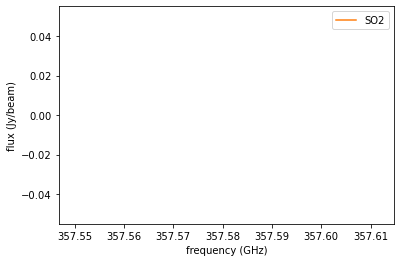

[0.0114543717, 0.0109223463, 0.01168973, 0.00879321527, 0.00741420127, 0.00767019903, 0.00858179852, 0.0103245024, 0.0109086595, 0.00680326112, 0.00447632931, 0.00498706754, 0.00816908758, 0.00961011089, 0.0108437901, 0.0111669125, 0.0127803059, 0.0129213063, 0.0133928871, 0.0144409891, 0.0140393339, 0.0159373544, 0.0180340428, 0.0191694852, 0.0232977755, 0.0299461242, 0.0344472267, 0.038864065, 0.0452569164, 0.0484478585, 0.0496002696, 0.0494847223, 0.045500312, 0.0428354032, 0.0432176813, 0.0405909643, 0.034525495, 0.0290233698, 0.027130181, 0.0274169892, 0.0229101982, 0.0163769778, 0.0146634523, 0.015946947, 0.0160692427, 0.0146391876, 0.0132428333, 0.0117887678, 0.0131345522, 0.0143444734, 0.0116414316, 0.0104964273, 0.0112752998, 0.0102920104, 0.00883097015, 0.00812821276, 0.00719720824, 0.00705544557, 0.0080292346, 0.00791712292]


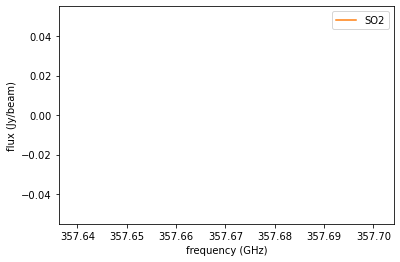

[-0.00153635757, -0.00116786128, -0.000375678821, 0.000195962188, 0.00193511124, 0.00402108347, 0.00401396444, 0.00424886309, 0.00417810632, 0.00222402229, -0.00054691371, -0.000544203504, 0.00347437547, 0.00760324905, 0.00723068696, 0.00762892608, 0.010529412, 0.0112672178, 0.0120256068, 0.0117176976, 0.0126579311, 0.0147968335, 0.0192668401, 0.0258131847, 0.0300352424, 0.0314636342, 0.0396770723, 0.0425331034, 0.0436682478, 0.0463488773, 0.0491595939, 0.0480106138, 0.044347994, 0.0445246473, 0.0432714894, 0.0412264578, 0.038568195, 0.0309280418, 0.0242257435, 0.0206385888, 0.0173056535, 0.016526958, 0.0172307137, 0.015202581, 0.0143163819, 0.0130884703, 0.0109189367, 0.00946051162, 0.00524150999, 0.0057453285, 0.00768742524, 0.00652883621, 0.00482329028, 0.00527509162, 0.00645954488, 0.00735882716, 0.00631733518, 0.00349174393, 0.0034114474, 0.00606535515]


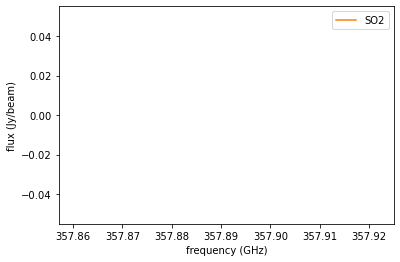

[0.00232833088, 0.000890654104, 0.00174338196, -0.000276420877, -0.00179962744, -3.09794632e-05, 0.00140477414, 0.00327162771, 0.00389780849, -0.000125372666, -0.00148846582, 0.00301679946, 0.00568668405, 0.00513102254, 0.00576468604, 0.00714306068, 0.00569007872, 0.00552453008, 0.0113057075, 0.0152370948, 0.0122691495, 0.0107180923, 0.0144367041, 0.0218595862, 0.0277902558, 0.0279570688, 0.0290017966, 0.0345801935, 0.0365811922, 0.0408472456, 0.0447585098, 0.0429306366, 0.0402132869, 0.0372339487, 0.0320205614, 0.0309930481, 0.0324279256, 0.0268111266, 0.019001903, 0.0179283507, 0.0219391119, 0.0215187967, 0.0203710124, 0.0167110637, 0.0113525605, 0.00218407786, -0.00124567526, 0.00295436825, 0.00628339266, 0.00659744348, 0.00753084896, 0.00822810922, 0.00753929187, 0.00886000227, 0.00927853398, 0.00906466879, 0.00833713077, 0.00792139303, 0.00799653493, 0.00619746465]


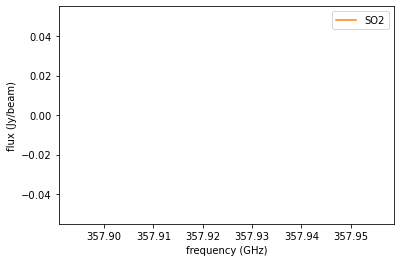

[0.00159911485, 0.00111104443, 0.00207423442, 0.00269703055, 0.00547380233, 0.00628807629, 0.00605544029, 0.00803882256, 0.0117778834, 0.0114899566, 0.00900433119, 0.00957207941, 0.00987449288, 0.00666038506, 0.00413648365, 0.00502375234, 0.00769519899, 0.00888833869, 0.0084439991, 0.01157849, 0.0192809701, 0.0210905857, 0.0172354262, 0.0131507497, 0.0163317025, 0.0258127656, 0.0312940292, 0.0309907086, 0.0333372988, 0.0412420854, 0.0441269092, 0.0425539948, 0.0429533757, 0.0420268402, 0.0372915529, 0.0329760723, 0.0326978229, 0.0334428549, 0.0322385393, 0.0269929525, 0.0202854406, 0.0168910325, 0.0178032108, 0.0184296519, 0.0140028242, 0.0114026535, 0.0115351239, 0.0114170611, 0.0125416815, 0.0160520375, 0.016726559, 0.0122457789, 0.0112934792, 0.0101279952, 0.00632937066, 0.00225478108, 0.0010134792, 0.0011999805, 0.000598457933, 0.000590309734]


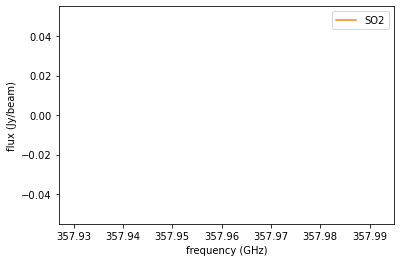

[-8.34415187e-05, 0.000652376504, 0.00103744643, -0.000904783956, 0.00118884223, 0.0042496589, 0.00229036598, -0.000659962592, 0.000670087175, 0.00522963284, 0.00944021717, 0.0110509153, 0.00991333369, 0.00956887193, 0.0117872255, 0.0104648052, 0.00788638461, 0.0116873328, 0.0142521448, 0.0174677894, 0.0210757945, 0.0221257769, 0.0230996888, 0.0241775177, 0.0277786069, 0.0343443975, 0.0403082445, 0.0417134203, 0.0416238755, 0.043958094, 0.0453164168, 0.0425064079, 0.035399843, 0.0294237472, 0.0293676089, 0.0302698426, 0.0238079987, 0.0174893159, 0.0178780984, 0.0162708741, 0.0125391856, 0.0121262288, 0.0137861194, 0.0135415504, 0.0124069359, 0.00829165615, 0.00747127319, 0.00756524084, 0.00595483743, 0.00488772849, 0.00256180111, 0.00205259933, 0.00554559333, 0.00559306797, 0.00302583934, 0.00252822926, 0.00440606568, 0.00739345141, 0.00861698389, 0.00707594864]


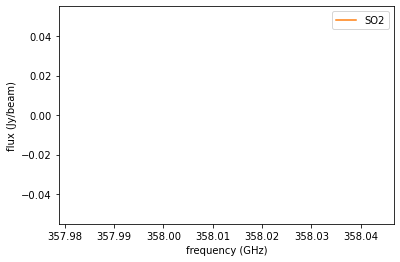

[0.00302583934, 0.00252822926, 0.00440606568, 0.00739345141, 0.00861698389, 0.00707594864, 0.0046683508, 0.00223620026, 0.00203758897, 0.00406682817, 0.00564123504, 0.00516514713, 0.00570619106, 0.0100517226, 0.0113819968, 0.0107661821, 0.0107814884, 0.0132109486, 0.0176794752, 0.0185300633, 0.0190947186, 0.0240461361, 0.0321652144, 0.0374981053, 0.0371418297, 0.033705689, 0.0316129886, 0.0294913482, 0.0283992235, 0.0312369633, 0.0314176157, 0.0261417348, 0.0211315211, 0.0179038048, 0.0159545261, 0.0123979468, 0.00890486222, 0.00649350975, 0.00847576186, 0.0109549677, 0.0080169579, 0.00328377192, 0.00372241088, 0.00535967387, 0.00396472402, 0.00401785458, 0.0046311589, 0.00246451446, 0.000436474569, -0.000449980493, -0.00129724725, -0.0027223709, -0.00171453669, 0.00240321062, 0.00518179964, 0.00477531645, 0.00324497651, 0.00340923225, 0.00354406098, 0.00133176392]


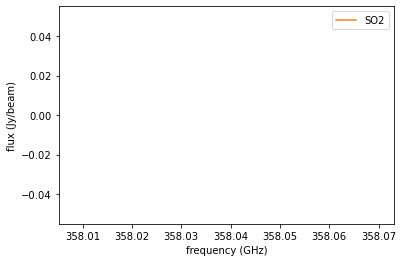

[0.00328149949, 0.00192071614, -0.00087286823, 0.00051755982, 0.00428911485, 0.00700109592, 0.00790126529, 0.00718355877, 0.00667003216, 0.00437047984, 0.00444030436, 0.0119435433, 0.0142157786, 0.00980389584, 0.00918587763, 0.0119867185, 0.0122963581, 0.0150912777, 0.0216246005, 0.0231112856, 0.020804761, 0.0226575118, 0.0267834328, 0.0305704344, 0.0357286409, 0.0428149588, 0.0496097952, 0.0550496727, 0.0593315922, 0.0607106239, 0.0630644336, 0.0619075373, 0.0563962497, 0.0548815429, 0.0543079153, 0.0496011525, 0.0440386683, 0.0397813804, 0.0365574174, 0.0312407613, 0.026872566, 0.0264341105, 0.0246106051, 0.0211605802, 0.0214805249, 0.0217468143, 0.0183267668, 0.0156674553, 0.0139913466, 0.011371485, 0.00972711015, 0.0108256843, 0.0133784954, 0.0143028423, 0.012790354, 0.0106851924, 0.00873577781, 0.00673885271, 0.00660562888, 0.00649182638]


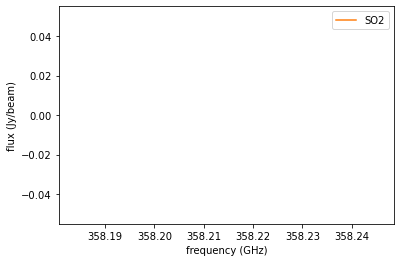

[0.00166807545, 0.00108086632, 0.00147668587, -0.000572927238, -0.00233925739, -0.00271809543, 0.000415988965, 0.00197010254, 0.00462892512, 0.00524764089, 0.00183894893, 0.00135675597, 0.00427196966, 0.00584860332, 0.0045518945, 0.00187349622, 0.000704752747, 0.000331691088, 0.000867598632, 0.0036263112, 0.00525286701, 0.00342931692, 0.0033030163, 0.00477816118, 0.00444272673, 0.00308457529, 0.00280665979, 0.00710473116, 0.0142854983, 0.0153573705, 0.0157941636, 0.0142960306, 0.0127012189, 0.0133456867, 0.0137737989, 0.013992032, 0.0141484831, 0.0106397653, 0.00688448455, 0.0057404968, 0.0102135763, 0.00941435248, 0.00277730962, 0.00155569718, 0.00329448376, 0.0011490921, -0.0020417308, -0.00106065301, 0.00264848233, 0.000859963009, -0.00354395411, -0.00243191258, -0.00146818929, -0.00306811882, -0.00129787042, 0.00290331943, 0.00440294808, 0.00259482185, 0.00111066899, 0.000286105351]


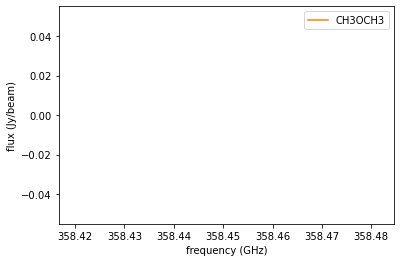

[-0.00183460757, -0.00398671534, -0.00203730725, -9.588385e-05, -0.000348222908, -0.000565227238, -7.06563105e-06, 0.000895000354, 0.00107328314, -0.000241710179, 0.000394891365, 0.0025883913, 0.0017880958, -0.000840716704, -0.00336203468, -0.0031362134, -0.000535001454, 0.00166911527, 0.00461785914, 0.0100810388, 0.0123829124, 0.00819707382, 0.00633774372, 0.0129390219, 0.0183838308, 0.0223295055, 0.0295375418, 0.0396274216, 0.0460034758, 0.0486677811, 0.050227806, 0.0499231592, 0.0478751063, 0.0455038995, 0.0440638773, 0.0413487181, 0.0359073803, 0.0273565892, 0.0181631502, 0.0108714486, 0.00912597775, 0.00554898661, 0.00203228369, 0.00139449362, 0.00137725275, 0.00136027369, 0.00041962284, -0.000673676201, -0.000904825458, -0.00138015568, -0.00216461276, -0.000420697033, 0.0011694436, 0.00229348894, 0.00114505261, 0.000379769248, 0.000576551538, -0.000473094551, 0.000147937011, 0.00104228256]


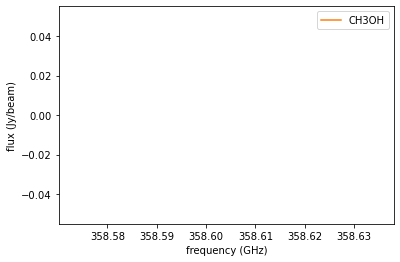

[-0.00207105698, 0.000594504119, 0.00357267982, 0.00264157937, -0.000111291818, -0.0015205862, -0.000796064734, 0.000575280923, -0.00036943052, -4.1230207e-05, 0.00179539842, 0.00214430597, 0.00264847907, 0.00247704936, 0.000793075364, 0.00116590376, 0.00460777711, 0.00564960763, 0.00471470086, 0.00503369374, 0.00693019899, 0.00974404998, 0.0105212424, 0.00924272276, 0.0106389187, 0.0165247153, 0.0180733968, 0.0155237811, 0.0142304851, 0.0166047066, 0.0191990267, 0.0160246585, 0.00829159189, 0.00493251905, 0.00269939122, 0.00206386251, 0.00386299519, 0.00484921969, 0.0044921767, 0.00546039455, 0.00547612645, 0.0040788264, 0.00349093205, 0.00399512658, 0.00368640013, 0.000343270076, -0.00223056553, -0.000914560165, 0.00228407723, 0.00460820505, 0.00347815664, 5.94729909e-06, -0.000280213921, 3.27199668e-05, -0.000667936227, -8.64326721e-05, -0.000253265549, -0.000400878576, -0.00119444553, -0.00381137966]


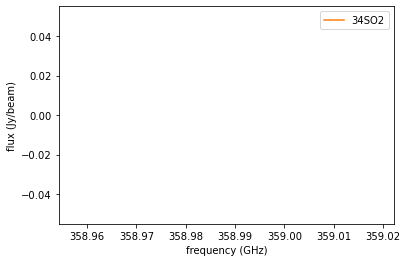

[-0.000932276074, -0.00194146589, 0.00291601522, 0.00411622506, 0.00253347121, 0.00165898341, 0.00188792939, 0.00263887714, 0.00430558017, 0.0054048514, 0.00636051968, 0.00886388402, 0.00925943628, 0.00619269814, 0.00354530499, 0.00470592408, 0.0047536334, 0.00574228493, 0.0127569344, 0.0151301837, 0.0134169124, 0.0137025509, 0.0185636561, 0.0233757887, 0.0278284252, 0.0318626948, 0.0345382281, 0.0368984453, 0.0384929739, 0.040010415, 0.0409026556, 0.0390193425, 0.0372557752, 0.0341825485, 0.0307952818, 0.029769918, 0.0280692726, 0.0267088115, 0.0258939303, 0.0221814346, 0.014522112, 0.0108669586, 0.0142103136, 0.0185713414, 0.015701035, 0.0127541637, 0.00999218319, 0.00937904231, 0.00948808435, 0.0085592838, 0.00553139579, 0.00444682082, 0.00353009347, 0.001175376, 0.00206050975, 0.00358225848, 0.00272827479, 0.00355260284, 0.00475398172, 0.00353157287]


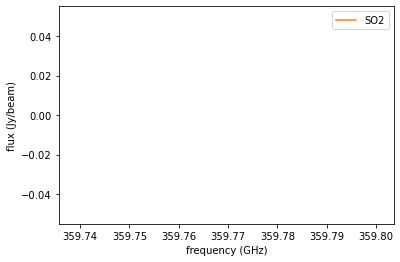

In [15]:
# 删掉识别不出的线和太密集的线
# 对齐速度
c=299792458

# name=['SO','CO','SO','HCO+','SO2']
# rest_fre=[344.31061200,345.79598990,346.52848100,356.73422300,358.21564000]

name_spw0=["HC15N","34SO2","SO","CH3OCH3","CH3OH","CH3OCH3","34SO2","34SO2","t-HCOOH"]
name_spw1=["SO2","CO"]
name_spw2=["CH3OH","SO","SO2","t-HCOOH","H13CO+","SiO"]
name_spw3=["HCO+","SO2","34SO2","SO2","SO2","SO2","CH3OCH3","SO2","SO2","SO2","SO2","SO2","SO2","SO2","SO2"]
name_spw4=["CH3OCH3","CH3OH","34SO2","SO2"]
name=[name_spw0,name_spw1,name_spw2,name_spw3,name_spw4]

spw0_peak=[344.19997631,344.24591399,344.31042249,344.35733694,344.44188244,344.51030006,344.57969546,344.80596309,345.03076456]
rest_fre0=[344.2003199, 344.2453476, 344.310612, 344.3580659, 344.443433, 344.5153801, 344.581045, 344.8079157,345.030561]

spw1_peak=[345.33849123,345.79395884]
rest_fre1=[345.3385391,345.7959899]

spw2_peak=[346.20164832,346.52858732,346.65173964,346.71624814,346.99822725,347.33054255]
rest_fre2=[346.202719,346.528481,346.6521672, 346.718858,  346.998344,347.330631]

spw3_peak=[356.73359532,356.75998539,357.10011993,357.16462743,357.2403759,357.38649655,357.45784651,357.58099883,357.67043123,357.89132257,357.92504249,357.96120636,358.01300872,358.03939879,358.21484185]
rest_fre3=[356.734223, 356.7551893, 357.1021822, 357.16536, 357.24119, 357.38757, 357.4602017, 357.5814483, 357.67178, 357.892442, 357.92596, 357.96289, 358.01309, 358.03808,358.21564]

spw4_peak=[358.45089029,358.6043418,358.98845945,359.76988829]
rest_fre4=[358.4519426, 358.605799, 358.9879745,359.7706815]

peak=[spw0_peak,spw1_peak,spw2_peak,spw3_peak,spw4_peak]
rest_fre=[rest_fre0,rest_fre1,rest_fre2,rest_fre3,rest_fre4]


x=[]
y=[]
data_flux=[]
#plt.figure(figsize=(10,6))
for i in range(len(data)):   #len(data)
    data_x,data_y=data_to_xy(data[i])   # 一个spw文件的所有x,y数据
    #for n in range(len(name)):    # 循环每一个spw
    x_large,y_large=enlarge2(peak[i],data_x,data_y)      # 一个光谱文件中，把所有的谱线挑出来，放在一个列表里 x_large=[[x,x,x,x],[x,x,x,x,x]]

    for j in range(len(x_large)):    # 循环一个spw的每一个峰len(x_large)
        list_x=[]
        list_y=[]

        for k in range(len(x_large[j])):            # 把某一个峰的列表数据取出来 peak1=x_large[i]=[x,x,x,x,x,x]
            #list_x.append((c*(x_large[j][k]-rest_fre[i][j])/rest_fre[i][j])/1000)
            #list_x.append((c*(x_large[k]-rest_fre[j])/rest_fre[j])/1000+239.5)   # 将频率转换为速度，并加上视向速度
            list_x.append(x_large[j][k])
            list_y.append(y_large[j][k])
            
#         print(list_x)
#         print(list_y)
#         plt.plot(list_x,list_y,label=name[i][j])
        
        y_flux=duiqi_v(list_x,list_y)
        print(list_y)
#         y_flux=list_y
        list_x_new,y_flux_new=hebin(list_x,y_flux)
        data_flux.append(y_flux_new)
        
        plt.plot(y_flux_new,label=name[i][j])
#        plt.plot(list_x,y_flux,label=name[i][j])
        
        plt.xlim(list_x_new[0]-0.02,list_x_new[-1]+0.02)
        ax = plt.gca()  # 获取当前轴
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

#         print(list_x)
#         print(y_flux)
        #plt.title(name[i])
#         plt.xlabel("velocities (km/s)")
        plt.xlabel("frequency (GHz)")
        plt.ylabel("flux (Jy/beam)")
        #plt.legend()
        #print(name[i])
        #plt.xlim(-1,1)
#         print("频率起始值：",list_x[0])
#         print("频率结束值：",list_x[-1])
#         print("频率步长：",list_x[1]-list_x[0])
#         print(len(list_x))
#         print("------------------------------------") 
        x.append(list_x)
        y.append(list_y)
        
        

        plt.legend()
        plt.show()

In [22]:
# # 对齐速度
# c=299792458

# # name=['SO','CO','SO','HCO+','SO2']
# # rest_fre=[344.31061200,345.79598990,346.52848100,356.73422300,358.21564000]

# name_spw0=["HC15N","34SO2","SO","CH3OCH3","CH3OH","CH3OCH3","34SO2","34SO2","34SO2","t-HCOOH"]
# name_spw1=["SO2","CO"]
# name_spw2=["CH3OH","SO2_v2=1???","SO","33SO2","SO2","t-HCOOH","H13CO+","13CH3OH???","SiO","SO+"]
# name_spw3=["HCO+","SO2","34SO2","SO2","SO2","SO2","CH3OCH3","SO2","SO2","SO2","SO2","SO2","SO2","SO2","SO2"]
# name_spw4=["CH3OCH3","CH3OH","34SO2","SO2","SO2"]
# name=[name_spw0,name_spw1,name_spw2,name_spw3,name_spw4]

# spw0_peak=[344.19997631,344.24591399,344.31042249,344.35733694,344.44188244,344.51030006,344.57969546,344.80596309,344.98629206,345.03076456]
# rest_fre0=[344.2003199, 344.2453476, 344.310612, 344.3580659, 344.443433, 344.5153801, 344.581045, 344.8079157, 344.9875851, 345.030561]

# spw1_peak=[345.33849123,345.79395884]
# rest_fre1=[345.3385391,345.7959899]

# spw2_peak=[346.20164832,346.37855655,346.52858732,346.5989605,346.65173964,346.71624814,346.99822725,347.18686485,347.33054255,347.73909471]
# rest_fre2=[346.202719, 346.3791906, 346.528481, 346.5900976, 346.6521672, 346.718858,  346.998344, 347.188283, 347.330631, 347.740011]

# spw3_peak=[356.73359532,356.75998539,357.10011993,357.16462743,357.2403759,357.38649655,357.45784651,357.58099883,357.67043123,357.89132257,357.92504249,357.96120636,358.01300872,358.03939879,358.21484185]
# rest_fre3=[356.734223, 356.7551893, 357.1021822, 357.16536, 357.24119, 357.38757, 357.4602017, 357.5814483, 357.67178, 357.892442, 357.92596, 357.96289, 358.01309, 358.03808,358.21564]

# spw4_peak=[358.45089029,358.6043418,358.98845945,359.14924081,359.76988829]
# rest_fre4=[358.4519426, 358.605799, 358.9879745, 359.151156,359.7706815]

# peak=[spw0_peak,spw1_peak,spw2_peak,spw3_peak,spw4_peak]
# rest_fre=[rest_fre0,rest_fre1,rest_fre2,rest_fre3,rest_fre4]


# x=[]
# y=[]
# data_flux=[]
# #plt.figure(figsize=(10,6))
# for i in range(len(data)):   #len(data)
#     data_x,data_y=data_to_xy(data[i])   # 一个spw文件的所有x,y数据
#     #for n in range(len(name)):    # 循环每一个spw
#     x_large,y_large=enlarge2(peak[i],data_x,data_y)      # 一个光谱文件中，把所有的谱线挑出来，放在一个列表里 x_large=[[x,x,x,x],[x,x,x,x,x]]

#     for j in range(len(x_large)):    # 循环一个spw的每一个峰len(x_large)
#         list_x=[]
#         list_y=[]

#         for k in range(len(x_large[j])):            # 把某一个峰的列表数据取出来 peak1=x_large[i]=[x,x,x,x,x,x]
#             #list_x.append((c*(x_large[j][k]-rest_fre[i][j])/rest_fre[i][j])/1000)
#             #list_x.append((c*(x_large[k]-rest_fre[j])/rest_fre[j])/1000+239.5)   # 将频率转换为速度，并加上视向速度
#             list_x.append(x_large[j][k])
#             list_y.append(y_large[j][k])
            
# #         print(list_x)
# #         print(list_y)
# #         plt.plot(list_x,list_y,label=name[i][j])
        
# #        y_flux=duiqi_v(list_x,list_y)
#         y_flux=list_y
#         list_x_new,y_flux_new=hebin(list_x,y_flux)
#         data_flux.append(y_flux_new)
        
#         plt.plot(list_x_new,y_flux_new,label=name[i][j])
# #         plt.plot(list_x,y_flux,label=name[i][j])
        
#         plt.xlim(list_x_new[0]-0.02,list_x_new[-1]+0.02)
#         ax = plt.gca()  # 获取当前轴
#         ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# #         print(list_x)
# #         print(y_flux)
#         #plt.title(name[i])
# #         plt.xlabel("velocities (km/s)")
#         plt.xlabel("frequency (GHz)")
#         plt.ylabel("flux (Jy/beam)")
#         #plt.legend()
#         #print(name[i])
#         #plt.xlim(-1,1)
# #         print("频率起始值：",list_x[0])
# #         print("频率结束值：",list_x[-1])
# #         print("频率步长：",list_x[1]-list_x[0])
# #         print(len(list_x))
# #         print("------------------------------------") 
#         x.append(list_x)
#         y.append(list_y)
        
        

#         plt.legend()
#         plt.show()

In [23]:
print(len(data_flux))
print(list(range(0,0+1*42,1)))

36
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


In [24]:
# # 对齐速度
# # 第一条可能是 SO 344.31061200
# # 第二条可能是 CO 345.79598990
# # 第三条可能是 SO 346.52848100
# # 第四条可能是 HCO+ 356.73422300
# # 第五条可能是 SO2 358.21564000
# c=299792458
# name=['SO','CO','SO','HCO+','SO2']
# rest_fre=[344.31061200,345.79598990,346.52848100,356.73422300,358.21564000]
# data_flux=[]

# for i in range(len(data)):
#     x,y=data_to_xy(data[i])
#     x_large,y_large=enlarge(x,y)
#     list_x=[]
#     list_y=[]
#     for j in range(len(x_large)):
#         #list_x.append((c*(x_large[j]-rest_fre[i])/rest_fre[i])/1000)
#         list_x.append((c*(x_large[j]-rest_fre[i])/rest_fre[i])/1000+239.5)   # 将频率转换为速度，并加上视向速度
#         list_y.append(y_large[j])
# #     plt.plot(list_x,list_y,label=name[i])
# #     plt.title(name[i])
# #     plt.xlabel("velocities (km/s)")
# #     plt.ylabel("flux (Jy/beam)")
    
#     y_flux=duiqi_v(list_x,list_y)
#     data_flux.append(y_flux)
    
#     #plt.legend()
#     #print(name[i])
#     #plt.xlim(-1,1)
# #     print("频率起始值：",list_x[0])
# #     print("频率结束值：",list_x[-1])
# #     print("频率步长：",list_x[1]-list_x[0])
# #     print(len(list_x))
# #     print("------------------------------------")
    
# # plt.legend()
# plt.show()
# #print(data_flux)

In [25]:
new_name = np.concatenate(name).tolist()
new_name=set(new_name)
print(new_name)

{'34SO2', 'HC15N', 'CO', 'SiO', 'SO', 'CH3OCH3', 't-HCOOH', 'HCO+', 'CH3OH', 'H13CO+', 'SO2'}


In [26]:
color_map = { 't-HCOOH':'#90EE90', 'SO2_v2=1???':'#D8BFD8'}


D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\conda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<class 'numpy.ndarray'>


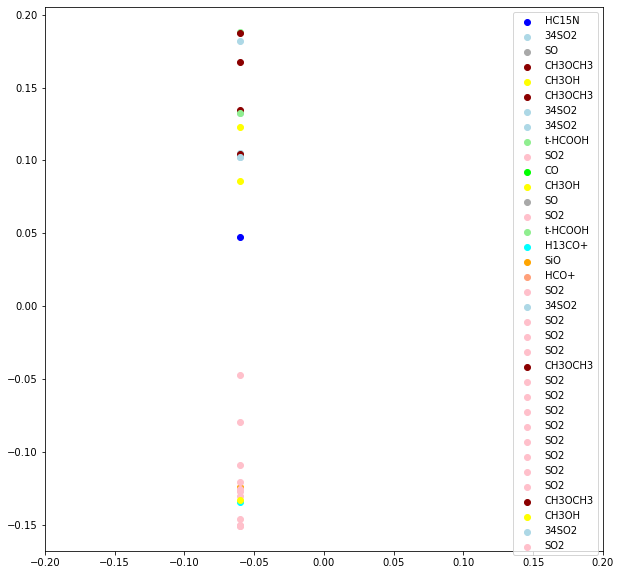

In [29]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE,MDS, Isomap,LocallyLinearEmbedding,SpectralEmbedding

 
tsne=TSNE(random_state=42)
mds=MDS(n_components=2)
#iso=Isomap(n_components=2,n_neighbors=30)
#local=LocallyLinearEmbedding(n_components=2)
spec=SpectralEmbedding(n_components=2)
 
digits_tsne=tsne.fit_transform(data_flux)
digits_mds=mds.fit_transform(data_flux)
# digits_iso=iso.fit_transform(data_flux)
# digits_local=local.fit_transform(data_flux)
digits_spec=spec.fit_transform(data_flux)
# print(digits_tsne)
# colors=['#476A2A','#7851B8','#BD3430','#4A2D4E','#875525',
#         '#A83683','#4E655E','#853541','#3A3120','#535D8E']

color_map = {'33SO2':'#000000', '13CH3OH???':'#FF0000', 'CO':'#00FF00', 'HC15N':'#0000FF', 'CH3OH':'#FFFF00','H13CO+':'#00FFFF','SO+':'#FF00FF','SiO':'#FFA500', 'SO2':'#FFC0CB', 'HCO+':'#FFA07A', 'SO':'#A9A9A9', 'CH3OCH3':'#8B0000', '34SO2':'#ADD8E6', 't-HCOOH':'#90EE90', 'SO2_v2=1???':'#D8BFD8'}
 
# plt.figure(figsize=(10,10))
# plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
# plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)

new_name = np.concatenate(name).tolist()
title=list(range(0,0+1*42,1))

# for i in range(len(digits_tsne)):
#     plt.scatter(digits_tsne[i, 0], digits_tsne[i, 1], color=color_map[new_name[i]], label=new_name[i])

# plt.legend()
# plt.xlabel('t-SNE feature 0')
# plt.ylabel('t-SNE feature 1')
# plt.show()

# # MDS
# plt.figure(figsize=(10,10))
# # plt.xlim(digits_mds[:,0].min(),digits_mds[:,0].max()+1)
# # plt.ylim(digits_mds[:,1].min(),digits_mds[:,1].max()+1)
# for i in range(len(digits_mds)):
# #     plt.text(digits_mds[i,0],digits_mds[i,1],str(new_name[i]),
# #              color=colors[i],
# #              fontdict={'weight':'bold','size':15})
#     plt.scatter(digits_mds[i, 0], digits_mds[i, 1], color=color_map[new_name[i]], label=new_name[i])
# # plt.ylim(-1,1)
# # plt.xlim(-1,1)
# plt.legend()
# plt.show()

# SpectralEmbedding
plt.figure(figsize=(10,10))
# plt.xlim(digits_spec[:,0].min(),digits_spec[:,0].max()+1)
# plt.ylim(digits_spec[:,1].min(),digits_spec[:,1].max()+1)
plt.xlim(-0.2,0.2)
for i in range(len(digits_spec)):
#     plt.text(digits_spec[i,0],digits_spec[i,1],str(new_name[i]),
#              color=colors[i],
#              fontdict={'weight':'bold','size':15})
    plt.scatter(digits_spec[i, 0], digits_spec[i, 1], color=color_map[new_name[i]], label=new_name[i])
print(type(digits_spec))
plt.legend()
plt.show()

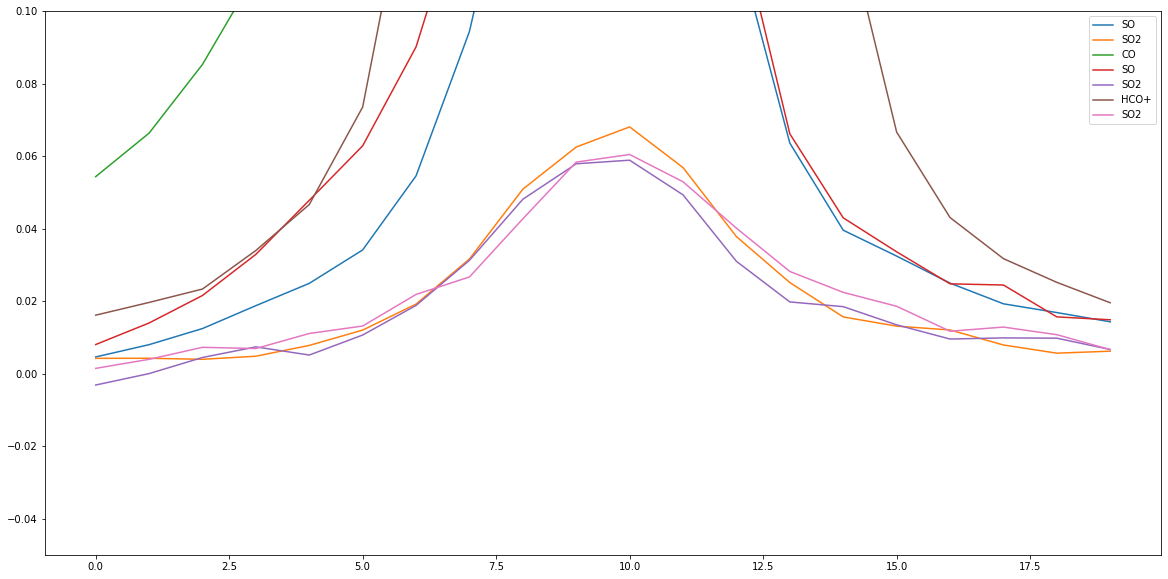

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


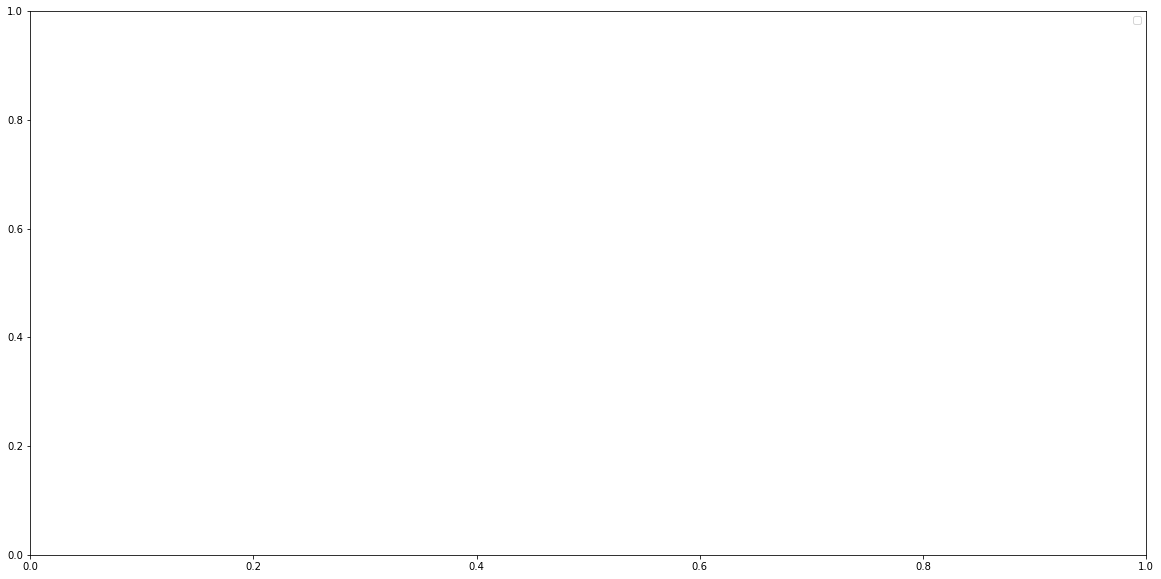

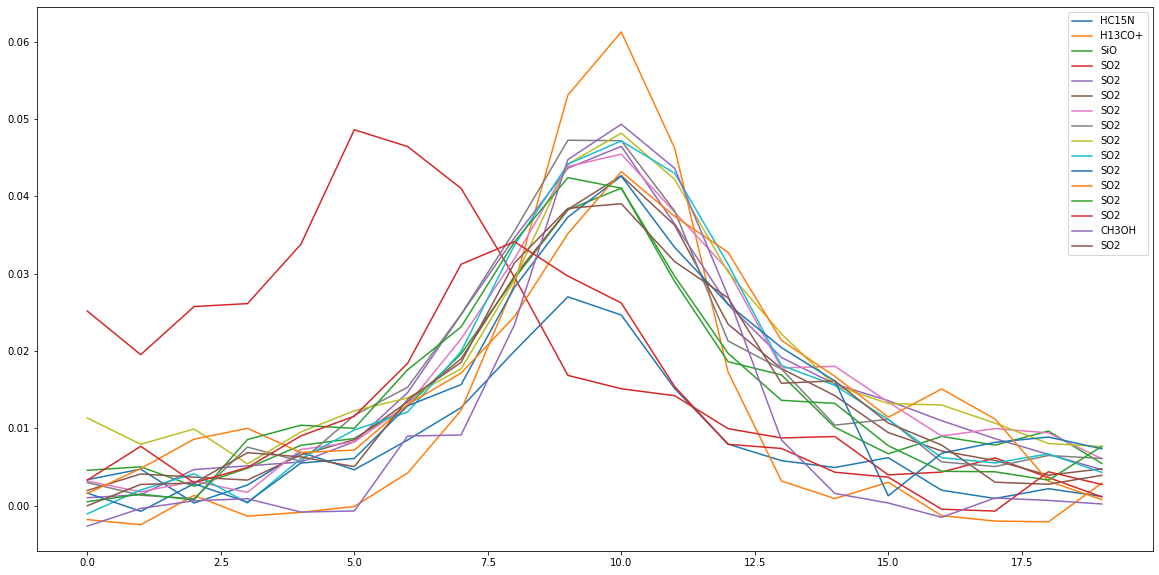

In [30]:
#print(digits_spec)
cate1=[]
name1=[]
cate2=[]
name2=[]
cate3=[]
name3=[]
for i in range(len(digits_spec)):
    if digits_spec[i,0]>0.0 and digits_spec[i,1]<0.05:
        cate1.append(data_flux[i])
        name1.append(new_name[i])
    elif digits_spec[i,0]>0.0 and digits_spec[i,1]>0.05:
        cate2.append(data_flux[i])
        name2.append(new_name[i])
    elif digits_spec[i,0]<0.0 and digits_spec[i,1]<0.05:
        cate3.append(data_flux[i])
        name3.append(new_name[i])

plt.figure(figsize=(20,10))
for i in range(len(cate1)):
    plt.plot(cate1[i],label=name1[i])

plt.ylim(-0.05,0.1)
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(cate2)):
    plt.plot(cate2[i],label=name2[i])

#plt.xlim(25,150)
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(cate3)):
    plt.plot(cate3[i],label=name3[i])

#plt.xlim(25,150)
plt.legend()
plt.show()

In [ ]:
list1=[0,1,2,3,4,5,6]
list3=[7,8,9,10,11,12,13]
list2=[]
list2.append(list1)
list2.append(list3)
print(list2[1][3])

In [152]:
# spw0的峰值
#[344.19997631,344.24591399,344.31042249,344.35733694,344.44188244,344.51030006,344.57969546,344.80596309,344.98629206,345.03076456]

# spw1的峰值
#[345.33849123,345.79395884]

# spw2的峰值
#[346.20164832,346.37855655,346.52858732,346.5989605,346.65173964,346.71624814,346.99822725,347.18686485,347.33054255,347.73909471]

# spw3的峰值
#[356.73359532,356.75998539,357.10011993,357.16462743,357.2403759,357.38649655,357.45784651,357.58099883,357.67043123,357.89132257,357.92504249,357.96120636,358.01300872,358.03939879,358.21484185]

# spw4的峰值
#[358.21484885,358.45089029,358.6043418,358.98845945,359.14924081,359.76988829]